In [1]:
#Installing necessary libraries
!pip3 install pandas
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install tabulate
!pip3 install boto3
!pip3 install s3fs
!pip3 install fsspec

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached botocore-1.22.2-py3-none-any.whl (8.0 MB)
  Attempting uninstall: botocore
    Found existing installation: botocore 1.20.106
    Uninstalling botocore-1.20.106:
      Successfully uninstalled botocore-1.20.106
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

aiobotocore 1.4.2 requires botocore<1.20.107,>=1.20.106, but you'll have botocore 1.22.2 

In [2]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from datetime import timedelta
from tabulate import tabulate
import boto3

In [3]:
client = boto3.client('s3')

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
#Reading final_app_events csv file and loading it in a DF

dfappevent=pd.read_csv('s3://capstone-project-sep2021/final_app_events.csv', delimiter=',', names= ["event_id", "app_id", "is_installed", "is_active"])

In [6]:
#First 10 entries of the new DF
dfappevent.head(10)

,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1
5,2,4775896950989639373,1,1
6,2,-8022267440849930066,1,0
7,2,9112463267739110219,1,0
8,2,-3725672010020973973,1,0
9,2,7167114343576723123,1,1


In [7]:
#Getting the info of the new DF
dfappevent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32473067 entries, 0 to 32473066
Data columns (total 4 columns):
 #   Column        Dtype
---  ------        -----
 0   event_id      int64
 1   app_id        int64
 2   is_installed  int64
 3   is_active     int64
dtypes: int64(4)
memory usage: 991.0 MB


In [8]:
#Validating to see if there are any null entries
dfappevent.isnull().sum()

event_id        0
app_id          0
is_installed    0
is_active       0
dtype: int64

In [9]:
#Ensuring that app_id has absolute values
dfappevent['app_id']=dfappevent.app_id.apply(abs)

In [10]:
#Revalidating the entries post above entry
dfappevent.head(10)

,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,5720078949152207372,1,0
2,2,1633887856876571208,1,0
3,2,653184325010919369,1,1
4,2,8693964245073640147,1,1
5,2,4775896950989639373,1,1
6,2,8022267440849930066,1,0
7,2,9112463267739110219,1,0
8,2,3725672010020973973,1,0
9,2,7167114343576723123,1,1


In [11]:
#Reading final_label_data csv file and loading it in a DF
dflabeldata = pd.read_csv('s3://capstone-project-sep2021/final_label_data.csv',delimiter=',',names=["app_id","category"], engine='python', error_bad_lines=False)

Skipping line 123004: ',' expected after '"'
Skipping line 123005: ',' expected after '"'
Skipping line 123006: ',' expected after '"'
Skipping line 123007: ',' expected after '"'
Skipping line 123008: ',' expected after '"'
Skipping line 123009: ',' expected after '"'
Skipping line 123010: ',' expected after '"'
Skipping line 123011: ',' expected after '"'
Skipping line 123012: ',' expected after '"'
Skipping line 123013: ',' expected after '"'
Skipping line 123014: field larger than field limit (131072)
Skipping line 125799: ',' expected after '"'
Skipping line 125800: ',' expected after '"'
Skipping line 125801: ',' expected after '"'
Skipping line 125802: ',' expected after '"'
Skipping line 125803: ',' expected after '"'
Skipping line 125804: ',' expected after '"'
Skipping line 125805: ',' expected after '"'
Skipping line 125806: field larger than field limit (131072)
Skipping line 126210: ',' expected after '"'
Skipping line 126220: ',' expected after '"'
Skipping line 126482: '

In [12]:
#Getting the info of the new DF
dflabeldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436835 entries, 0 to 436834
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   app_id    436835 non-null  int64 
 1   category  436835 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.7+ MB


In [13]:
#Changing the type of the columns
dflabeldata['category']=dflabeldata['category'].apply(lambda x : str(x))
dflabeldata['app_id']=dflabeldata.app_id.apply(abs)

In [14]:
#Getting the info of the new DF
dflabeldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436835 entries, 0 to 436834
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   app_id    436835 non-null  int64 
 1   category  436835 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.7+ MB


In [15]:
#Reading final_events_data csv file and loading it in a DF
dfeventdata=pd.read_csv('s3://capstone-project-sep2021/final_event_data.csv',delimiter=',', names= ["device_id",'gender','age','age_group',"event_id","timestamp",'longitude','latitude'])

In [16]:
#First 10 entries of the new DF
dfeventdata.head(10)

,device_id,gender,age,age_group,event_id,timestamp,longitude,latitude
0,-9223067244542180000,M,24,M0-24,\N,\N,\N,\N
1,-9222956879900150000,M,36,M32+,11281,2016-05-07 11:36:04,0.0,0.0
2,-9222956879900150000,M,36,M32+,12679,2016-05-07 12:18:35,113.24,23.19
3,-9222956879900150000,M,36,M32+,49383,2016-05-07 15:44:45,0.0,0.0
4,-9222956879900150000,M,36,M32+,131849,2016-05-07 12:06:35,113.24,23.19
5,-9222956879900150000,M,36,M32+,205471,2016-05-06 15:36:46,113.24,23.19
6,-9222956879900150000,M,36,M32+,211711,2016-05-06 21:26:14,113.24,23.19
7,-9222956879900150000,M,36,M32+,229069,2016-05-06 15:34:19,113.24,23.19
8,-9222956879900150000,M,36,M32+,229087,2016-05-06 15:33:50,113.24,23.19
9,-9222956879900150000,M,36,M32+,289564,2016-05-06 21:26:44,113.24,23.19


In [17]:
#Getting the info of the new DF
dfeventdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266933 entries, 0 to 1266932
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   device_id  1266933 non-null  int64 
 1   gender     1266933 non-null  object
 2   age        1266933 non-null  int64 
 3   age_group  1266933 non-null  object
 4   event_id   1266933 non-null  object
 5   timestamp  1266933 non-null  object
 6   longitude  1266933 non-null  object
 7   latitude   1266933 non-null  object
dtypes: int64(2), object(6)
memory usage: 77.3+ MB


In [18]:
#Changing the type of the columns
dfeventdata["event_id"]=dfeventdata["event_id"].str.replace("\\","",)
dfeventdata["timestamp"]=dfeventdata["timestamp"].str.replace("\\","",)
dfeventdata["longitude"]=dfeventdata["longitude"].str.replace("\\","",)
dfeventdata["latitude"]=dfeventdata["latitude"].str.replace("\\","",)

dfeventdata["event_id"]=dfeventdata["event_id"].str.replace("N","0",)
dfeventdata["timestamp"]=dfeventdata["timestamp"].str.replace("N","2021-05-05 00:00:00",)
dfeventdata["longitude"]=dfeventdata["longitude"].str.replace("N","0",)
dfeventdata["latitude"]=dfeventdata["latitude"].str.replace("N","0",)

In [19]:
#Change datatypes to required datatype format.
dfeventdata['device_id']=dfeventdata['device_id'].apply(abs)
dfeventdata['timestamp']=pd.to_datetime(dfeventdata['timestamp'])
dfeventdata["longitude"]=dfeventdata["longitude"].astype(float)
dfeventdata["latitude"]=dfeventdata["latitude"].astype(float)
dfeventdata['event_id']=dfeventdata["event_id"].astype(int)
dfeventdata['gender']=dfeventdata["gender"].astype("string")
dfeventdata['age_group']=dfeventdata["age_group"].astype("string")

In [20]:
#Getting the info of the new DF
dfeventdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266933 entries, 0 to 1266932
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   device_id  1266933 non-null  int64         
 1   gender     1266933 non-null  string        
 2   age        1266933 non-null  int64         
 3   age_group  1266933 non-null  string        
 4   event_id   1266933 non-null  int64         
 5   timestamp  1266933 non-null  datetime64[ns]
 6   longitude  1266933 non-null  float64       
 7   latitude   1266933 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), string(2)
memory usage: 77.3 MB


In [21]:
#Calculating the Values
dfeventdata.describe()

,device_id,age,event_id,longitude,latitude
count,1.266933e+06,1.266933e+06,1.266933e+06,1.266933e+06,1.266933e+06
mean,4.634877e+18,3.340051e+01,1.560763e+06,7.521735e+01,2.094308e+01
std,2.617042e+18,9.762003e+00,9.747112e+05,5.493059e+01,1.592072e+01
min,5.036611e+13,1.000000e+00,0.000000e+00,-1.800000e+02,-3.380000e+01
25%,2.400791e+18,2.600000e+01,7.091030e+05,0.000000e+00,0.000000e+00
50%,4.645192e+18,3.100000e+01,1.557841e+06,1.122600e+02,2.782000e+01
75%,6.854440e+18,3.900000e+01,2.405959e+06,1.170400e+02,3.305000e+01
max,9.223067e+18,9.600000e+01,3.252948e+06,1.511800e+02,5.364000e+01


In [22]:
#Validating longitude values.  longitude should be between -180 to 180
dfeventdata.longitude.describe()

count    1.266933e+06
mean     7.521735e+01
std      5.493059e+01
min     -1.800000e+02
25%      0.000000e+00
50%      1.122600e+02
75%      1.170400e+02
max      1.511800e+02
Name: longitude, dtype: float64

In [23]:
#Validating latitude values.  latitude should be between -90 to 90
dfeventdata.latitude.describe()

count    1.266933e+06
mean     2.094308e+01
std      1.592072e+01
min     -3.380000e+01
25%      0.000000e+00
50%      2.782000e+01
75%      3.305000e+01
max      5.364000e+01
Name: latitude, dtype: float64

In [24]:
#Reading final_non_event_data csv file and loading it in a DF
dfnoneventdata=pd.read_csv('s3://capstone-project-sep2021/final_non_event_data.csv',delimiter=',', names= ["device_id","gender",'age',"age_group","device_brand","phone_brand"], encoding='utf-8')

In [25]:
#Getting the info of the new DF
dfnoneventdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74646 entries, 0 to 74645
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     74646 non-null  int64 
 1   gender        74646 non-null  object
 2   age           74646 non-null  int64 
 3   age_group     74646 non-null  object
 4   device_brand  74646 non-null  object
 5   phone_brand   74646 non-null  object
dtypes: int64(2), object(4)
memory usage: 3.4+ MB


In [26]:
#First 10 entries of the new DF
dfnoneventdata.head(10)

,device_id,gender,age,age_group,device_brand,phone_brand
0,-9223067244542180000,M,24,M0-24,vivo,Y19T
1,-9222956879900150000,M,36,M32+,samsung,Galaxy Note 2
2,-9222754701995930000,M,29,M25-32,Coolpad,8730L
3,-9222352239947200000,M,23,M0-24,Xiaomi,xnote11
4,-9222173362545970000,F,56,F32+,samsung,Galaxy Note 2
5,-9221639938103560000,F,27,F25-32,Xiaomi,xnote2
6,-9221307795397200000,M,33,M32+,Coolpad,900tr2123
7,-9221086586254640000,M,29,M25-32,Xiaomi,x11S
8,-9221066489596330000,M,31,M25-32,lenovo,K860i
9,-9221046405740900000,M,38,M32+,Huawei,G510


In [27]:
#Change datatypes to required datatype format
dfnoneventdata['device_id']=dfnoneventdata['device_id'].apply(abs)
dfnoneventdata['device_brand']=dfnoneventdata["device_brand"].astype("str")
dfnoneventdata['gender']=dfnoneventdata["gender"].astype("str")
dfnoneventdata['phone_brand']=dfnoneventdata.phone_brand.str.replace(r'[^\x00-\x7F]+', '')

In [28]:
#First 10 entries of the new DF
dfnoneventdata.head(10)

,device_id,gender,age,age_group,device_brand,phone_brand
0,9223067244542180000,M,24,M0-24,vivo,Y19T
1,9222956879900150000,M,36,M32+,samsung,Galaxy Note 2
2,9222754701995930000,M,29,M25-32,Coolpad,8730L
3,9222352239947200000,M,23,M0-24,Xiaomi,xnote11
4,9222173362545970000,F,56,F32+,samsung,Galaxy Note 2
5,9221639938103560000,F,27,F25-32,Xiaomi,xnote2
6,9221307795397200000,M,33,M32+,Coolpad,900tr2123
7,9221086586254640000,M,29,M25-32,Xiaomi,x11S
8,9221066489596330000,M,31,M25-32,lenovo,K860i
9,9221046405740900000,M,38,M32+,Huawei,G510


In [29]:
#####EDA

<AxesSubplot:xlabel='gender', ylabel='Count'>

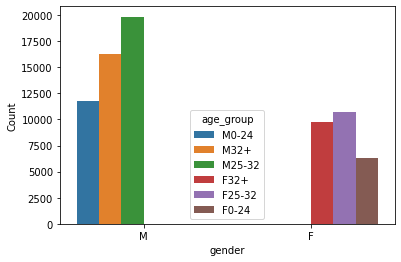

In [30]:
#1. Plot appropriate graphs representing the distribution of age and gender in the data set [univariate].

dfnoneventdata['Count']=1

sns.barplot(data = dfnoneventdata, x = 'gender', y='Count', hue= 'age_group',estimator = np.sum)

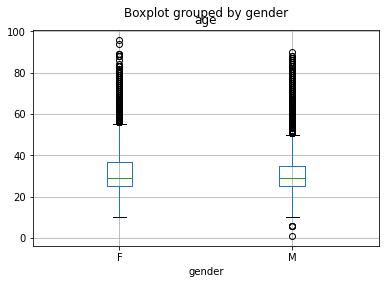

In [31]:
#2. Boxplot analysis for gender and age [bivariate]
dfnoneventdata.boxplot(column='age', by='gender')
plt.show()

<AxesSubplot:>

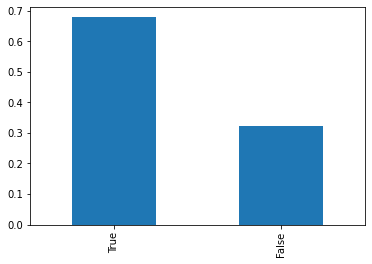

In [32]:
#3. Plot the percentage of the device_ids with and without event data. 

dfeventdata['Count']=1
dfeventdata['flag']=((dfeventdata['longitude']!=0) & (dfeventdata['latitude']!=0)&(dfeventdata['event_id']!=0))
dfeventdata['flag'].value_counts(normalize=True).plot(kind='bar')

In [33]:
#Change datatypes to required datatype format
dfeventdata['flag']= dfeventdata['flag'].apply(lambda x: 1 if x==True else 0)
#assigning data without event details 
dfeventnodata=dfeventdata[dfeventdata['flag']==0]
print(dfeventnodata.shape)

#assigning data with event details 
dfeventdata=dfeventdata[dfeventdata['flag']==1]
print(dfeventdata.shape)

(407640, 10)
(859293, 10)


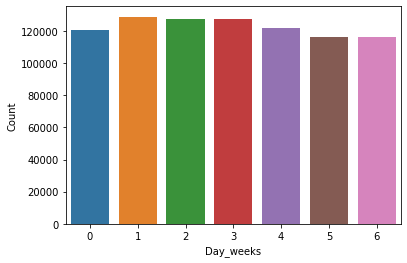

In [34]:
#4. Plot a graph representing the distribution of events over different days of a week. 
dfeventdata['Day_weeks']=dfeventdata['timestamp'].apply(lambda x: x.weekday())
sns.barplot(data=dfeventdata, x = 'Day_weeks', y='Count',estimator = np.sum)
plt.show()

In [35]:
#5. Plot a graph representing the distribution of events per hour [for one-week data].
dfeventdata['hours']=dfeventdata['timestamp'].apply(lambda x: x.hour)
dfeventdata.hours

2          12
4          12
5          15
6          21
7          15
           ..
1266866     3
1266875    19
1266891     7
1266900    11
1266927    11
Name: hours, Length: 859293, dtype: int64

In [36]:
#Change datatypes to required datatype format
dfeventdata['week_of_year'] = dfeventdata.timestamp.apply(lambda x: x.weekofyear)
dfeventdata.week_of_year.value_counts()

18    742971
17    116322
Name: week_of_year, dtype: int64

In [37]:
#Carving out only a specific week data
dfeventweek=dfeventdata[dfeventdata['week_of_year']==17]
dfeventweek.sample(10)

,device_id,gender,age,age_group,event_id,timestamp,longitude,latitude,Count,flag,Day_weeks,hours,week_of_year
391424,3518798689933310000,M,30,M25-32,173398,2016-05-01 11:32:35,109.55,31.05,1,1,6,11,17
472280,2511395840834720000,M,27,M25-32,2957074,2016-05-01 21:10:36,1.00,1.00,1,1,6,21,17
217268,6127113861188220000,M,32,M25-32,3140421,2016-05-01 15:49:46,116.42,39.85,1,1,6,15,17
386550,3588747489088130000,F,37,F32+,2918893,2016-05-01 19:28:54,112.21,28.07,1,1,6,19,17
201987,6263539463080760000,F,53,F32+,1850843,2016-05-01 11:43:01,120.40,36.17,1,1,6,11,17
759509,1931509655515140000,M,53,M32+,926465,2016-05-01 12:41:09,113.72,37.57,1,1,6,12,17
535696,1543433923574950000,F,29,F25-32,906299,2016-05-01 17:55:27,111.54,24.43,1,1,6,17,17
163408,6828890587571450000,M,26,M25-32,1331733,2016-05-01 08:57:31,120.12,29.31,1,1,6,8,17
1131223,7166563712658300000,M,60,M32+,1671237,2016-05-01 13:38:07,117.96,28.47,1,1,6,13,17
541451,1474154142826940000,M,36,M32+,2185680,2016-05-01 14:48:20,116.16,39.75,1,1,6,14,17


<function matplotlib.pyplot.show(close=None, block=None)>

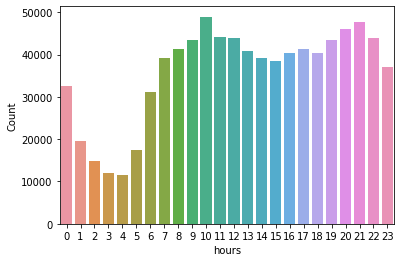

In [38]:
sns.barplot(data=dfeventdata, x='hours', y='Count',estimator = np.sum)
plt.show

<AxesSubplot:xlabel='hours', ylabel='Count'>

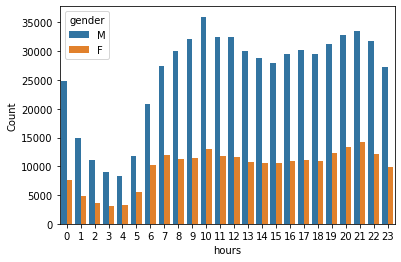

In [39]:
#6. The difference in the distribution of events per hour for Male and Female consumers. [Show the difference using an appropriate chart for one-week data.]
sns.barplot(data=dfeventdata, x='hours', y='Count',hue= 'gender',estimator = np.sum)

In [40]:
#Getting the top 5 rows
dfeventdata.head(5)

,device_id,gender,age,age_group,event_id,timestamp,longitude,latitude,Count,flag,Day_weeks,hours,week_of_year
2,9222956879900150000,M,36,M32+,12679,2016-05-07 12:18:35,113.24,23.19,1,1,5,12,18
4,9222956879900150000,M,36,M32+,131849,2016-05-07 12:06:35,113.24,23.19,1,1,5,12,18
5,9222956879900150000,M,36,M32+,205471,2016-05-06 15:36:46,113.24,23.19,1,1,4,15,18
6,9222956879900150000,M,36,M32+,211711,2016-05-06 21:26:14,113.24,23.19,1,1,4,21,18
7,9222956879900150000,M,36,M32+,229069,2016-05-06 15:34:19,113.24,23.19,1,1,4,15,18


In [41]:
#7. Is there any difference in the distribution of Events for different Age Groups over different days of the week? [Consider the following age groups: 0–24, 25–32, 33–45, and 46+]
dfeventdata['age_group']=dfeventdata['age_group'].apply(lambda x: x[1:])
dfeventdata['age_group'].value_counts()

32+      392944
25-32    341155
0-24     125194
Name: age_group, dtype: int64

<AxesSubplot:xlabel='Day_weeks', ylabel='Count'>

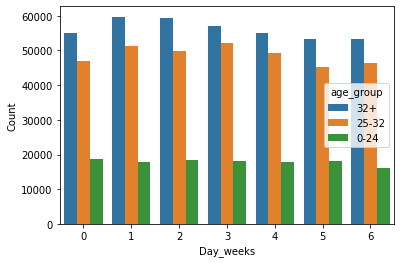

In [42]:
#Display of barplot
sns.barplot(data=dfeventdata, x = 'Day_weeks', y='Count',hue= 'age_group',estimator = np.sum)

In [43]:
#Showcasing value counts across age groups
dfeventdata.age_group.value_counts()

32+      392944
25-32    341155
0-24     125194
Name: age_group, dtype: int64

In [44]:
#8. Stacked bar chart for the top 10 mobile brands across male and female consumers.
top10brand=dfnoneventdata.device_brand.value_counts()[0:10]
top10brand

Xiaomi     17300
samsung    13669
Huawei     12960
OPPO        5783
vivo        5637
Meizu       4699
Coolpad     3339
lenovo      2691
Gionee      1123
HTC         1013
Name: device_brand, dtype: int64

In [45]:
mob=['Xiaomi','samsung','Huawei','OPPO','vivo','Meizu','Coolpad','lenovo','Gionee','HTC']
top10brand=dfnoneventdata[dfnoneventdata['device_brand'].isin(mob)]
top10brand.sample(10)

,device_id,gender,age,age_group,device_brand,phone_brand,Count
59352,5450847761385090000,M,46,M32+,Xiaomi,x1,1
69293,7894218768335210000,M,20,M0-24,Huawei,7i,1
73561,8963020038022060000,M,20,M0-24,Huawei,4X,1
28760,2126547214213710000,F,37,F32+,samsung,Galaxy Note 2,1
13262,5936156240484970000,F,20,F0-24,OPPO,R827T,1
59114,5401785456646610000,M,33,M32+,Meizu,MX5,1
8349,7153351891088590000,M,41,M32+,vivo,S7I,1
40266,721933290314511000,M,39,M32+,Huawei,3X,1
29389,1969739369820760000,F,30,F25-32,OPPO,R1C,1
72811,8780146868947760000,F,34,F32+,Coolpad,5956,1


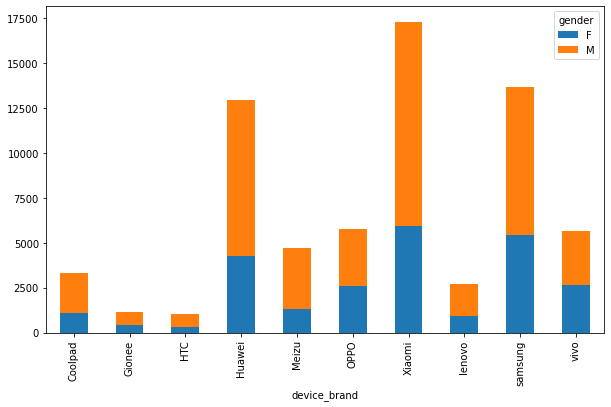

In [46]:
pivot=pd.pivot_table(data=top10brand, index='device_brand', columns='gender', values='Count', aggfunc='sum')
pivot.plot(kind="bar", stacked="True", figsize=[10,6])
plt.show()

In [47]:
#9. Prepare a chart representing the ten frequently used applications and their respective male and female percentage.

#Total number of users who have installed the app
topapp = dfeventdata.merge(dfappevent, on='event_id')

In [48]:
appcount=topapp.app_id.value_counts()[0:10]
appcount

8693964245073640147    162356
5927333115845830913    128691
4348659952760821294    123122
628020936226491308      94954
3433289601737013244     68883
7348340405200054701     51561
6284164581582112235     47048
8948670408023620661     45499
5729517255058371973     44523
2320783822570582843     41913
Name: app_id, dtype: int64

In [49]:
x=[8693964245073640147, 5927333115845830913, 4348659952760821294, 628020936226491308, 3433289601737013244, 2320783822570582843, 6284164581582112235, 5729517255058371973, 8948670408023620661, 3683147815759994238]
app_sample=topapp[topapp['app_id'].isin(x)]
app_sample.sample(5)

,device_id,gender,age,age_group,event_id,timestamp,longitude,latitude,Count,flag,Day_weeks,hours,week_of_year,app_id,is_installed,is_active
2439333,42961107734561600,M,28,25-32,2303138,2016-05-06 00:36:09,117.98,24.61,1,1,4,0,18,4348659952760821294,1,1
936489,5444703814462630000,F,23,0-24,187869,2016-05-02 21:20:18,119.57,30.86,1,1,0,21,18,8693964245073640147,1,1
3320044,2976914939399440000,F,28,25-32,3138405,2016-05-02 14:14:16,103.88,30.81,1,1,0,14,18,628020936226491308,1,1
201325,8301650690669780000,M,42,32+,2998005,2016-05-06 12:57:32,119.41,32.20,1,1,4,12,18,8693964245073640147,1,0
1350136,3907798047502040000,M,29,25-32,679789,2016-05-03 14:20:58,120.96,31.41,1,1,1,14,18,4348659952760821294,1,0


<AxesSubplot:xlabel='app_id,gender'>

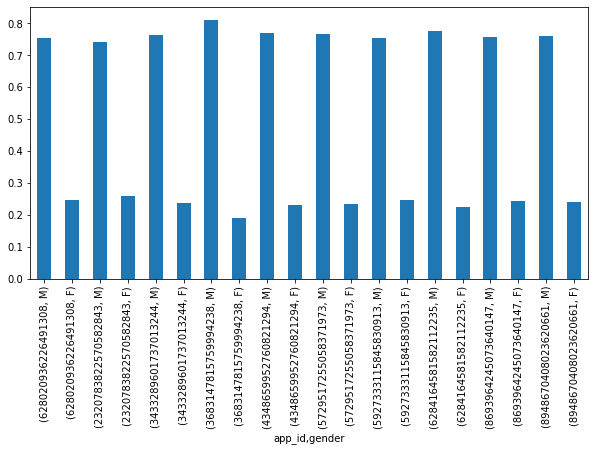

In [50]:
app_sample.groupby('app_id')['gender'].value_counts(normalize=True).plot(kind="bar", stacked="True", figsize=[10,5])

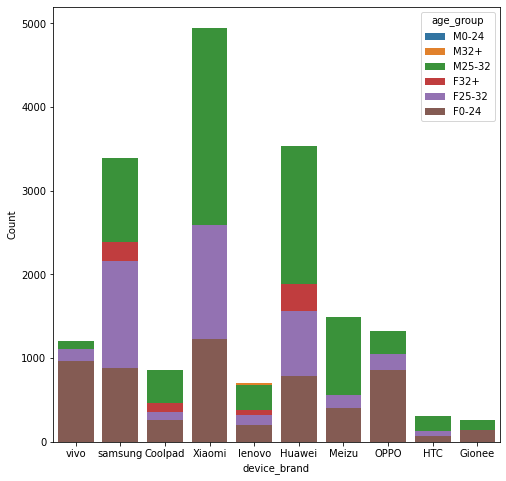

In [51]:
#10. List the top 10 mobile phone brands bought by customers by age groups. [Consider the following age groups: 0–24, 25–32, 33–45, and 46+]
fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(data =top10brand, x = 'device_brand', y='Count',hue= 'age_group',estimator = np.sum, dodge= False)
plt.show()

In [52]:
##feature engineering

In [53]:
#1. Considering the events data, you can create a feature called Average Events, which can give you an estimate of how long the users' mobile phones are active.

In [54]:
Avgevent=dfeventdata.groupby('device_id')['Count'].sum()
Avgevent=Avgevent.to_frame()
Avgevent['Average']=(Avgevent['Count']/Avgevent['Count'].sum())*100
Avgevent= Avgevent['Average'].to_frame()
Avgevent.sample(10)

,Average
device_id,
5820979872442000000,0.010823
6031581433677470000,0.001164
7172658427943150000,0.005819
679142927640773000,0.017107
4294753544473110000,0.009310
5184843826620500000,0.002909
7367262162443820000,0.006633
3656132883647860000,0.053183
7250088706397510000,0.004306


In [55]:
Avgevent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11980 entries, 2385668677718310 to 9222956879900150000
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Average  11980 non-null  float64
dtypes: float64(1)
memory usage: 187.2 KB


In [56]:
dfeventdata=dfeventdata.merge(Avgevent, on='device_id', how='inner')
dfeventdata.sample(5)

,device_id,gender,age,age_group,event_id,timestamp,longitude,latitude,Count,flag,Day_weeks,hours,week_of_year,Average
845981,8879672715748670000,M,31,25-32,2222500,2016-05-03 22:38:06,121.32,31.06,1,1,1,22,18,0.018620
574637,3044177087333560000,M,53,32+,194010,2016-05-05 23:24:07,117.18,26.90,1,1,3,23,18,0.018038
22529,8658253277334370000,M,24,0-24,936688,2016-05-06 19:37:39,127.49,50.24,1,1,4,19,18,0.056907
248958,3903059712853410000,F,46,32+,1813060,2016-05-01 22:38:43,109.19,34.74,1,1,6,22,17,0.006866
363673,1652871882320730000,M,31,25-32,1334671,2016-05-07 10:32:18,1.00,1.00,1,1,5,10,18,0.040964


In [57]:
#2. You can use the information related to the location of the users (latitude and longitude data) to create features representing changes in the latitude and longitude details at different times of the day.

In [58]:
dfloc=dfeventdata.groupby(['device_id','longitude','latitude'])['Count'].sum()
dfloc=pd.DataFrame(data=dfloc)
dfloc.sample(5)

,,,Count
device_id,longitude,latitude,
1289243613815300000,119.28,26.10,2
5070792900202240000,106.58,29.65,1
1153910750523970000,108.78,34.23,11
5579147762755410000,114.26,30.57,1
5982602838212570000,115.90,28.66,2


In [59]:
dfcountdev=dfeventdata.groupby('device_id')['Count'].sum()
dfcountdev=pd.DataFrame(data=dfcountdev)
dfcountdev.sample(5)

,Count
device_id,
6793597291824870000,4
5255884550690110000,60
716242923594038000,14
5906807789525860000,5
5227797713911120000,138


In [60]:
dfloc=dfloc.merge(dfcountdev, on='device_id', how='left')
dfloc['change']=dfloc['Count_x']/dfloc['Count_y']
dfloc['c_flag']=dfloc['change'].apply(lambda x: 0 if x==1 else 1)
dfloc['c_flag'].value_counts()

1    43392
0     4980
Name: c_flag, dtype: int64

In [61]:
dfloc=dfloc.reset_index()
dfloc=dfloc[dfloc['change']!=1]
dfloc=dfloc[['device_id','c_flag']]
dfloc.drop_duplicates(subset='device_id',inplace=True)
dfloc.shape

(7000, 2)

In [62]:
dfloc.sample(5)

,device_id,c_flag
8169,1672908181859390000,1
20633,3857410204003270000,1
44516,8425982648867560000,1
35534,6716140592517400000,1
8855,1800886563498980000,1


In [63]:
dfeventdata=dfeventdata.merge(dfloc, on='device_id',how='left')
dfeventdata['change_flag']=dfeventdata['c_flag'].apply(lambda x: 0 if x!=1 else 1)
dfeventdata['change_flag'].value_counts()

1    722628
0    136665
Name: change_flag, dtype: int64

In [64]:
dfeventdata=dfeventdata.drop(columns=['c_flag'])

In [65]:
dfeventdata.head(5)

,device_id,gender,age,age_group,event_id,timestamp,longitude,latitude,Count,flag,Day_weeks,hours,week_of_year,Average,change_flag
0,9222956879900150000,M,36,32+,12679,2016-05-07 12:18:35,113.24,23.19,1,1,5,12,18,0.006051,0
1,9222956879900150000,M,36,32+,131849,2016-05-07 12:06:35,113.24,23.19,1,1,5,12,18,0.006051,0
2,9222956879900150000,M,36,32+,205471,2016-05-06 15:36:46,113.24,23.19,1,1,4,15,18,0.006051,0
3,9222956879900150000,M,36,32+,211711,2016-05-06 21:26:14,113.24,23.19,1,1,4,21,18,0.006051,0
4,9222956879900150000,M,36,32+,229069,2016-05-06 15:34:19,113.24,23.19,1,1,4,15,18,0.006051,0


In [66]:
#3.You can create features such as Median Latitude and Median Longitude for different event ids.

In [67]:
dflonglat=dfeventdata.groupby('event_id')['longitude'].median()
dflonglat=pd.DataFrame(data=dflonglat)
dflonglat.rename(columns={'longitude':'lg_median'},inplace=True)
dflonglat.sample(5)
dfeventdata=dfeventdata.merge(dflonglat, on='event_id', how='inner')
dfeventdata.sample(5)

,device_id,gender,age,age_group,event_id,timestamp,longitude,latitude,Count,flag,Day_weeks,hours,week_of_year,Average,change_flag,lg_median
379725,1348266885080490000,M,23,0-24,1023888,2016-05-06 21:40:13,123.50,41.73,1,1,4,21,18,0.005120,1,123.50
744941,6556238795193780000,M,30,25-32,342219,2016-05-05 08:51:39,121.05,28.18,1,1,3,8,18,0.093798,1,121.05
617024,3938296868828970000,M,18,0-24,1260188,2016-05-05 18:41:21,116.58,23.66,1,1,3,18,18,0.004189,0,116.58
81005,7417241229334250000,M,40,32+,242496,2016-05-06 04:08:38,108.37,30.83,1,1,4,4,18,0.111720,1,108.37
474177,992109739203134000,F,52,32+,2729476,2016-05-02 15:22:28,123.48,41.78,1,1,0,15,18,0.028395,1,123.48


In [68]:
dflonglat=dfeventdata.groupby('event_id')['latitude'].median()
dflonglat=pd.DataFrame(data=dflonglat)
dflonglat.rename(columns={'latitude':'lt_median'},inplace=True)
dfeventdata=dfeventdata.merge(dflonglat, on='event_id', how='inner')
dfeventdata.sample(5)

,device_id,gender,age,age_group,event_id,timestamp,longitude,latitude,Count,flag,Day_weeks,hours,week_of_year,Average,change_flag,lg_median,lt_median
656902,4804474219212560000,F,43,32+,2850999,2016-05-04 09:57:27,114.21,35.62,1,1,2,9,18,0.012918,1,114.21,35.62
560215,2726339378971290000,F,37,32+,2123731,2016-05-05 22:22:47,113.58,23.56,1,1,3,22,18,0.010125,1,113.58,23.56
475276,1023369573882580000,M,30,25-32,3166206,2016-05-03 19:15:26,114.48,22.99,1,1,1,19,18,0.053765,1,114.48,22.99
730626,6252266641108360000,F,39,32+,110716,2016-05-06 18:22:12,113.89,23.06,1,1,4,18,18,0.030490,1,113.89,23.06
105332,6925480406979320000,F,27,25-32,2488704,2016-05-01 21:03:46,116.97,32.62,1,1,6,21,17,0.013034,1,116.97,32.62


In [69]:
#4.You can also group the existing categories to create a new supercategory #that will establish a significance in predicting the outcome variable.

In [70]:
dflabeldata["category"]=dflabeldata["category"].str.lower()

In [71]:
dflabeldata['super_category_game']=dflabeldata['category'].str.contains('game')

In [72]:
dflabeldata['super_finance']=(dflabeldata['category'].str.contains('finance') | dflabeldata['category'].str.contains('loan') | dflabeldata['category'].str.contains('exchange')|
                              dflabeldata['category'].str.contains('equity')|dflabeldata['category'].str.contains('bank'))
dflabeldata['super_finance'].value_counts()

False    431593
True       5242
Name: super_finance, dtype: int64

In [73]:
dflabeldata['super_travel']=(dflabeldata['category'].str.contains('travel') | dflabeldata['category'].str.contains('aviation') | dflabeldata['category'].str.contains('rentals'))
dflabeldata['super_travel'].value_counts()

False    436257
True        578
Name: super_travel, dtype: int64

In [74]:
dflabeldata['super_health']=(dflabeldata['category'].str.contains('beauty') |dflabeldata['category'].str.contains('health') )
dflabeldata['super_health'].value_counts()

False    436799
True         36
Name: super_health, dtype: int64

In [75]:
dflabeldata['others']=(~dflabeldata['super_travel'] | ~dflabeldata['super_finance'] | ~dflabeldata['super_category_game'] |~dflabeldata['super_health'])

In [76]:
dflabeldata['super_category_game']=dflabeldata['super_category_game'].apply(lambda x: 1 if x==True else 0)
dflabeldata['super_finance']=dflabeldata['super_finance'].apply(lambda x: 1 if x==True else 0)
dflabeldata['super_travel']=dflabeldata['super_travel'].apply(lambda x: 1 if x==True else 0)
dflabeldata['super_health']=dflabeldata['super_health'].apply(lambda x: 1 if x==True else 0)
dflabeldata['others']=dflabeldata['others'].apply(lambda x: 1 if x==True else 0)

In [77]:
dflabeldata.sample(5)

,app_id,category,super_category_game,super_finance,super_travel,super_health,others
336660,983998797291748388,relatives,0,0,0,0,1
118414,2545737006761375069,families with babies,0,0,0,0,1
138513,6567746363264558544,industry tag,0,0,0,0,1
199468,2980108404625706770,custom label,0,0,0,0,1
192228,8280676163071030626,custom label,0,0,0,0,1


In [78]:
#Clustering

In [79]:
#Installing scikit-learn
!pip3 install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [80]:
import sklearn

In [81]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [82]:
dfeventdata.sample(5)

,device_id,gender,age,age_group,event_id,timestamp,longitude,latitude,Count,flag,Day_weeks,hours,week_of_year,Average,change_flag,lg_median,lt_median
538532,2358250186430570000,M,43,32+,939319,2016-05-05 21:47:24,112.26,30.32,1,1,3,21,18,0.070058,1,112.26,30.32
515983,1858929737091030000,F,34,32+,2883946,2016-05-03 16:32:34,117.13,39.22,1,1,1,16,18,0.010823,1,117.13,39.22
78215,7505063740126950000,M,34,32+,666069,2016-05-04 04:42:38,117.17,39.14,1,1,2,4,18,0.040731,1,117.17,39.14
202301,4995671438514200000,M,41,32+,1108071,2016-05-02 03:28:40,106.69,26.51,1,1,0,3,18,0.005819,1,106.69,26.51
33465,8417909748264590000,F,31,25-32,3063616,2016-05-07 06:34:23,106.49,29.75,1,1,5,6,18,0.065053,0,106.49,29.75


In [83]:
dfloc=dfeventdata.groupby(['device_id','lg_median','lt_median'])['Count'].sum()
dfloc=pd.DataFrame(data=dfloc)
dfloc=dfloc.reset_index()
dfloc.sample(5), dfloc.shape

(                 device_id  lg_median  lt_median  Count
 6220   1310531206624290000     114.19      30.60      3
 45836  8669915825062050000     113.87      34.22      5
 1319    291409447840670000     108.21      34.27     41
 40987  7730364354275370000     117.11      36.85     40
 46847  8886768683305250000     118.84      31.91      2,
 (48372, 4))

In [84]:
dfeventdatafeatures=dfloc[['lg_median','lt_median']].values
dfeventdatafet=dfloc[['lg_median','lt_median']]
dfeventdatafeatures

array([[114.48,  29.93],
       [119.46,  35.42],
       [113.62,  34.72],
       ...,
       [114.37,  30.88],
       [114.37,  30.89],
       [113.24,  23.19]])

In [85]:
# instantiate
scaler = StandardScaler()

# fit_transform
dfeventdatascaled = scaler.fit_transform(dfeventdatafet)
dfeventdatascaled = pd.DataFrame(data = dfeventdatascaled, columns=['longitude','latitude'])

# Top 5 rows
dfeventdatascaled.head()

,longitude,latitude
0,0.089477,-0.212704
1,0.417338,0.564832
2,0.032859,0.465692
3,-0.264059,-1.410874
4,-0.264059,-1.409457


In [86]:
kms_per_radian = 6371.0088
epsilon = 1.5/kms_per_radian
db = DBSCAN(eps= epsilon, min_samples= 5, algorithm = 'ball_tree', metric = 'haversine').fit(np.radians(dfeventdatascaled))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([dfeventdatafeatures[cluster_labels ==n] for n in range(num_clusters)])
print('Number of clusters : {}'.format(num_clusters))

Number of clusters : 568


In [87]:
clusters

0      [[114.48, 29.93], [114.32, 29.82], [114.32, 29...
1      [[119.46, 35.42], [119.44, 35.37], [119.52, 35...
2      [[113.62, 34.72], [111.84, 34.76], [113.56, 34...
3      [[109.11, 21.47], [109.11, 21.48], [109.13, 21...
4      [[121.32, 28.54], [121.32, 28.56], [121.33, 28...
                             ...                        
563    [[116.38, 32.77], [116.4, 32.64], [116.59, 32....
564    [[113.99, 38.55], [114.06, 38.66], [114.07, 38...
565    [[106.36, 27.85], [106.39, 27.79], [106.39, 27...
566    [[115.27, 23.5], [115.3, 23.47], [115.18, 23.6...
567                                                   []
Length: 568, dtype: object

In [88]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # 2D PCA for the plot
reduceddf = pd.DataFrame(pca.fit_transform(dfeventdatascaled))

In [89]:
dfpcseventdatascaled = pd.DataFrame({'PC1':reduceddf[0],'PC2':reduceddf[1]})
dfpcseventdatascaled.index = dfeventdatascaled.index
dfpcseventdatascaled.head()

,PC1,PC2
0,0.087134,-0.213674
1,-0.694499,0.104294
2,-0.352529,0.306059
3,1.184356,-0.810920
4,1.183355,-0.809919


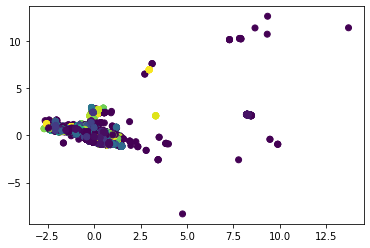

In [90]:
fig = plt.figure()
plt.scatter(dfpcseventdatascaled['PC1'], dfpcseventdatascaled['PC2'], c = db.labels_)
plt.show()

In [91]:
dfloc['cluster_id']=db.labels_
dfclusterdata=dfloc[['device_id','cluster_id']]
dfeventdata1=dfeventdata.merge(dfclusterdata,on='device_id',how='inner')
dfeventdata=dfeventdata1.drop_duplicates(subset=["event_id"])

In [92]:
dfeventdata.shape

(859293, 18)

In [93]:
dfeventdata.head()

,device_id,gender,age,age_group,event_id,timestamp,longitude,latitude,Count,flag,Day_weeks,hours,week_of_year,Average,change_flag,lg_median,lt_median,cluster_id
0,9222956879900150000,M,36,32+,12679,2016-05-07 12:18:35,113.24,23.19,1,1,5,12,18,0.006051,0,113.24,23.19,14
1,9222956879900150000,M,36,32+,131849,2016-05-07 12:06:35,113.24,23.19,1,1,5,12,18,0.006051,0,113.24,23.19,14
2,9222956879900150000,M,36,32+,205471,2016-05-06 15:36:46,113.24,23.19,1,1,4,15,18,0.006051,0,113.24,23.19,14
3,9222956879900150000,M,36,32+,211711,2016-05-06 21:26:14,113.24,23.19,1,1,4,21,18,0.006051,0,113.24,23.19,14
4,9222956879900150000,M,36,32+,229069,2016-05-06 15:34:19,113.24,23.19,1,1,4,15,18,0.006051,0,113.24,23.19,14


In [94]:
#Prepare Data for the data thats present (latitude-longitude data, application id data, event data and devices data)

In [95]:
dfeventdata = dfeventdata.drop(columns=['lg_median','lt_median','longitude','latitude','timestamp'])
dfeventdata.sample(5)

,device_id,gender,age,age_group,event_id,Count,flag,Day_weeks,hours,week_of_year,Average,change_flag,cluster_id
291570,8730307490994650000,F,58,32+,2753017,1,1,3,14,18,0.033632,1,6
6841870,2336441622261300000,M,28,25-32,45887,1,1,3,13,18,0.004771,1,6
8326329,4314973743800610000,M,31,25-32,2440040,1,1,5,23,18,0.001396,0,80
6627762,2204630292293180000,F,33,32+,844529,1,1,6,12,17,0.053532,0,20
9340801,5463782024685680000,F,41,32+,3149260,1,1,6,19,17,0.000698,0,499


In [96]:
dfnoneventdata.sample(5)

,device_id,gender,age,age_group,device_brand,phone_brand,Count
36583,205683734531857000,M,44,M32+,Huawei,5,1
7164,7463556533112170000,M,24,M0-24,Coolpad,8720L,1
9079,6992586379050290000,F,26,F25-32,samsung,Galaxy Note 2,1
65331,6908408710073310000,F,21,F0-24,Meizu,menote1,1
48361,2726344222869500000,M,25,M25-32,oneplus,One,1


In [97]:
dfnoneventdata = dfnoneventdata.drop(columns=['gender','age_group','Count'])
dfnoneventdata.sample(5)

,device_id,age,device_brand,phone_brand
43518,1533363301536180000,26,Huawei,Ascend P6
35243,527482989909947000,34,OPPO,R7s
26537,2670392286357820000,25,vivo,X5SL
23216,3481783700413430000,32,Xiaomi,xnote
54977,4367907138881660000,39,samsung,Galaxy S5


In [98]:
dflabeldata = dflabeldata.drop(columns=['category'])
dflabeldata.sample(5)

,app_id,super_category_game,super_finance,super_travel,super_health,others
136015,1415907494215963944,0,0,0,0,1
79876,7937002964052583505,0,0,0,0,1
413972,615950792130502554,0,0,0,0,1
98933,4416322685099076928,0,0,0,0,1
162513,8129169057837398484,0,0,0,0,1


In [99]:
dfappevent.sample(5)

,event_id,app_id,is_installed,is_active
2116523,212671,3377762563562413489,1,1
24985018,2502077,8271866350659046570,1,1
16491277,1647997,1633852593328009081,1,0
9904943,993943,5099453940784075687,1,1
8831754,886379,7054804880832650555,1,0


In [100]:
#Scenario 1

In [101]:
#Loading data into CSV file

dfeventdata.to_csv('edaeventdata.csv')
dfappevent.to_csv('edaappevent.csv')
dfnoneventdata.to_csv('edanoneventdata.csv')
dflabeldata.to_csv('edalabeldata.csv')

In [102]:
#Scenario 2

In [103]:
#Loading data into CSV file

dfeventnodata.to_csv('eventnodata.csv')

In [104]:
import os
import sys
os.environ["PYSPARK_PYTHON"] = "/bin/python3"
os.environ["JAVA_HOME"] = "/usr/java/jdk1.8.0_161/jre"
os.environ["SPARK_HOME"] = "/home/ec2-user/spark-2.4.4-bin-hadoop2.7"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
sys.path.insert(0, os.environ["PYLIB"] + "/py4j-0.10.7-src.zip")
sys.path.insert(0, os.environ["PYLIB"] + "/pyspark.zip")

In [105]:
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark.sql.functions import when , col, countDistinct

spark = SparkSession.builder.appName('capstone').getOrCreate()

21/10/24 07:59:55 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [106]:
sappevent= spark.read.format('csv').options(header='true').load('edaappevent.csv')

In [107]:
type(sappevent)

pyspark.sql.dataframe.DataFrame

In [108]:
sappevent.count()

32473067

In [109]:
sappevent.show(5)

+---+--------+-------------------+------------+---------+
|_c0|event_id|             app_id|is_installed|is_active|
+---+--------+-------------------+------------+---------+
|  0|       2|5927333115845830913|           1|        1|
|  1|       2|5720078949152207372|           1|        0|
|  2|       2|1633887856876571208|           1|        0|
|  3|       2| 653184325010919369|           1|        1|
|  4|       2|8693964245073640147|           1|        1|
+---+--------+-------------------+------------+---------+
only showing top 5 rows



21/10/24 08:00:13 WARN CSVDataSource: CSV header does not conform to the schema.
 Header: , event_id, app_id, is_installed, is_active
 Schema: _c0, event_id, app_id, is_installed, is_active
Expected: _c0 but found: 
CSV file: file:///home/ec2-user/edaappevent.csv


In [110]:
sappevent=sappevent.withColumnRenamed("_c0", "ID")
sappevent.show(5)

+---+--------+-------------------+------------+---------+
| ID|event_id|             app_id|is_installed|is_active|
+---+--------+-------------------+------------+---------+
|  0|       2|5927333115845830913|           1|        1|
|  1|       2|5720078949152207372|           1|        0|
|  2|       2|1633887856876571208|           1|        0|
|  3|       2| 653184325010919369|           1|        1|
|  4|       2|8693964245073640147|           1|        1|
+---+--------+-------------------+------------+---------+
only showing top 5 rows



21/10/24 08:00:13 WARN CSVDataSource: CSV header does not conform to the schema.
 Header: , event_id, app_id, is_installed, is_active
 Schema: _c0, event_id, app_id, is_installed, is_active
Expected: _c0 but found: 
CSV file: file:///home/ec2-user/edaappevent.csv


In [111]:
seventdata= spark.read.format('csv').options(header='true',delimiter=',').load('edaeventdata.csv')
seventdata.show(5)

+---+-------------------+------+---+---------+--------+-----+----+---------+-----+------------+--------------------+-----------+----------+
|_c0|          device_id|gender|age|age_group|event_id|Count|flag|Day_weeks|hours|week_of_year|             Average|change_flag|cluster_id|
+---+-------------------+------+---+---------+--------+-----+----+---------+-----+------------+--------------------+-----------+----------+
|  0|9222956879900150000|     M| 36|      32+|   12679|    1|   1|        5|   12|          18|0.006051486512749435|          0|        14|
|  1|9222956879900150000|     M| 36|      32+|  131849|    1|   1|        5|   12|          18|0.006051486512749435|          0|        14|
|  2|9222956879900150000|     M| 36|      32+|  205471|    1|   1|        4|   15|          18|0.006051486512749435|          0|        14|
|  3|9222956879900150000|     M| 36|      32+|  211711|    1|   1|        4|   21|          18|0.006051486512749435|          0|        14|
|  4|922295687990015

21/10/24 08:00:14 WARN CSVDataSource: CSV header does not conform to the schema.
 Header: , device_id, gender, age, age_group, event_id, Count, flag, Day_weeks, hours, week_of_year, Average, change_flag, cluster_id
 Schema: _c0, device_id, gender, age, age_group, event_id, Count, flag, Day_weeks, hours, week_of_year, Average, change_flag, cluster_id
Expected: _c0 but found: 
CSV file: file:///home/ec2-user/edaeventdata.csv


In [112]:
seventdata=seventdata.withColumnRenamed("_c0", "ID")
seventdata.show(5)

+---+-------------------+------+---+---------+--------+-----+----+---------+-----+------------+--------------------+-----------+----------+
| ID|          device_id|gender|age|age_group|event_id|Count|flag|Day_weeks|hours|week_of_year|             Average|change_flag|cluster_id|
+---+-------------------+------+---+---------+--------+-----+----+---------+-----+------------+--------------------+-----------+----------+
|  0|9222956879900150000|     M| 36|      32+|   12679|    1|   1|        5|   12|          18|0.006051486512749435|          0|        14|
|  1|9222956879900150000|     M| 36|      32+|  131849|    1|   1|        5|   12|          18|0.006051486512749435|          0|        14|
|  2|9222956879900150000|     M| 36|      32+|  205471|    1|   1|        4|   15|          18|0.006051486512749435|          0|        14|
|  3|9222956879900150000|     M| 36|      32+|  211711|    1|   1|        4|   21|          18|0.006051486512749435|          0|        14|
|  4|922295687990015

21/10/24 08:00:14 WARN CSVDataSource: CSV header does not conform to the schema.
 Header: , device_id, gender, age, age_group, event_id, Count, flag, Day_weeks, hours, week_of_year, Average, change_flag, cluster_id
 Schema: _c0, device_id, gender, age, age_group, event_id, Count, flag, Day_weeks, hours, week_of_year, Average, change_flag, cluster_id
Expected: _c0 but found: 
CSV file: file:///home/ec2-user/edaeventdata.csv


In [113]:
slabeldata= spark.read.format('csv').options(header='true').load('edalabeldata.csv')
slabeldata.show(3)

+---+-------------------+-------------------+-------------+------------+------------+------+
|_c0|             app_id|super_category_game|super_finance|super_travel|super_health|others|
+---+-------------------+-------------------+-------------+------------+------------+------+
|  0|7324884708820027918|                  0|            1|           0|           0|     1|
|  1|4494216993218550286|                  0|            1|           0|           0|     1|
|  2|6058196446775239644|                  0|            0|           0|           0|     1|
+---+-------------------+-------------------+-------------+------------+------------+------+
only showing top 3 rows



21/10/24 08:00:14 WARN CSVDataSource: CSV header does not conform to the schema.
 Header: , app_id, super_category_game, super_finance, super_travel, super_health, others
 Schema: _c0, app_id, super_category_game, super_finance, super_travel, super_health, others
Expected: _c0 but found: 
CSV file: file:///home/ec2-user/edalabeldata.csv


In [114]:
slabeldata=slabeldata.withColumnRenamed("_c0", "ID")
slabeldata.show(5)

+---+-------------------+-------------------+-------------+------------+------------+------+
| ID|             app_id|super_category_game|super_finance|super_travel|super_health|others|
+---+-------------------+-------------------+-------------+------------+------------+------+
|  0|7324884708820027918|                  0|            1|           0|           0|     1|
|  1|4494216993218550286|                  0|            1|           0|           0|     1|
|  2|6058196446775239644|                  0|            0|           0|           0|     1|
|  3|6058196446775239644|                  0|            1|           0|           0|     1|
|  4|8694625920731541625|                  0|            0|           0|           0|     1|
+---+-------------------+-------------------+-------------+------------+------------+------+
only showing top 5 rows



21/10/24 08:00:15 WARN CSVDataSource: CSV header does not conform to the schema.
 Header: , app_id, super_category_game, super_finance, super_travel, super_health, others
 Schema: _c0, app_id, super_category_game, super_finance, super_travel, super_health, others
Expected: _c0 but found: 
CSV file: file:///home/ec2-user/edalabeldata.csv


In [115]:
snonevent= spark.read.format('csv').options(header='true').load('edanoneventdata.csv')
snonevent.show(5)

+---+-------------------+---+------------+-------------+
|_c0|          device_id|age|device_brand|  phone_brand|
+---+-------------------+---+------------+-------------+
|  0|9223067244542180000| 24|        vivo|         Y19T|
|  1|9222956879900150000| 36|     samsung|Galaxy Note 2|
|  2|9222754701995930000| 29|     Coolpad|        8730L|
|  3|9222352239947200000| 23|      Xiaomi|      xnote11|
|  4|9222173362545970000| 56|     samsung|Galaxy Note 2|
+---+-------------------+---+------------+-------------+
only showing top 5 rows



21/10/24 08:00:15 WARN CSVDataSource: CSV header does not conform to the schema.
 Header: , device_id, age, device_brand, phone_brand
 Schema: _c0, device_id, age, device_brand, phone_brand
Expected: _c0 but found: 
CSV file: file:///home/ec2-user/edanoneventdata.csv


In [116]:
snonevent=snonevent.withColumnRenamed("_c0", "ID")
snonevent.show(5)

+---+-------------------+---+------------+-------------+
| ID|          device_id|age|device_brand|  phone_brand|
+---+-------------------+---+------------+-------------+
|  0|9223067244542180000| 24|        vivo|         Y19T|
|  1|9222956879900150000| 36|     samsung|Galaxy Note 2|
|  2|9222754701995930000| 29|     Coolpad|        8730L|
|  3|9222352239947200000| 23|      Xiaomi|      xnote11|
|  4|9222173362545970000| 56|     samsung|Galaxy Note 2|
+---+-------------------+---+------------+-------------+
only showing top 5 rows



21/10/24 08:00:15 WARN CSVDataSource: CSV header does not conform to the schema.
 Header: , device_id, age, device_brand, phone_brand
 Schema: _c0, device_id, age, device_brand, phone_brand
Expected: _c0 but found: 
CSV file: file:///home/ec2-user/edanoneventdata.csv


In [117]:
snonevent=snonevent.drop("age")

In [118]:
sapplabel = sappevent.join(slabeldata,['app_id'],how='inner')
sapplabel.show(5)

21/10/24 08:00:16 WARN CSVDataSource: CSV header does not conform to the schema.
 Header: , app_id, super_category_game, super_finance, super_travel, super_health, others
 Schema: _c0, app_id, super_category_game, super_finance, super_travel, super_health, others
Expected: _c0 but found: 
CSV file: file:///home/ec2-user/edalabeldata.csv
[Stage 14:>                 (0 + 4) / 4][Stage 15:>                (0 + 0) / 10]21/10/24 08:00:17 WARN CSVDataSource: CSV header does not conform to the schema.
 Header: , event_id, app_id, is_installed, is_active
 Schema: _c0, event_id, app_id, is_installed, is_active
Expected: _c0 but found: 
CSV file: file:///home/ec2-user/edaappevent.csv
[Stage 15:===================================================>     (9 + 1) / 10]

+-------------------+------+--------+------------+---------+------+-------------------+-------------+------------+------------+------+
|             app_id|    ID|event_id|is_installed|is_active|    ID|super_category_game|super_finance|super_travel|super_health|others|
+-------------------+------+--------+------------+---------+------+-------------------+-------------+------------+------------+------+
|1000044012126765960|106921|    8400|           1|        1| 37095|                  0|            0|           0|           0|     1|
|1000044012126765960|106921|    8400|           1|        1|112479|                  0|            0|           0|           0|     1|
|1000044012126765960|106921|    8400|           1|        1|218621|                  0|            0|           0|           0|     1|
|1000044012126765960|106921|    8400|           1|        1|243598|                  0|            0|           0|           0|     1|
|1000044012126765960|106921|    8400|           1|     

In [119]:
seventapp = sapplabel.join(seventdata,['event_id'],how='inner')
seventapp.show(5)

21/10/24 08:00:58 WARN CSVDataSource: CSV header does not conform to the schema.
 Header: , device_id, gender, age, age_group, event_id, Count, flag, Day_weeks, hours, week_of_year, Average, change_flag, cluster_id
 Schema: _c0, device_id, gender, age, age_group, event_id, Count, flag, Day_weeks, hours, week_of_year, Average, change_flag, cluster_id
Expected: _c0 but found: 
CSV file: file:///home/ec2-user/edaeventdata.csv
[Stage 17:>   (0 + 4) / 4][Stage 18:>  (0 + 0) / 10][Stage 19:>   (0 + 0) / 4]21/10/24 08:01:00 WARN CSVDataSource: CSV header does not conform to the schema.
 Header: , event_id, app_id, is_installed, is_active
 Schema: _c0, event_id, app_id, is_installed, is_active
Expected: _c0 but found: 
CSV file: file:///home/ec2-user/edaappevent.csv
[Stage 18:==========>      (6 + 4) / 10][Stage 19:>                 (0 + 0) / 4]21/10/24 08:01:32 WARN CSVDataSource: CSV header does not conform to the schema.
 Header: , app_id, super_category_game, super_finance, super_travel, s

+--------+-------------------+--------+------------+---------+------+-------------------+-------------+------------+------------+------+-------+-------------------+------+---+---------+-----+----+---------+-----+------------+-------------------+-----------+----------+
|event_id|             app_id|      ID|is_installed|is_active|    ID|super_category_game|super_finance|super_travel|super_health|others|     ID|          device_id|gender|age|age_group|Count|flag|Day_weeks|hours|week_of_year|            Average|change_flag|cluster_id|
+--------+-------------------+--------+------------+---------+------+-------------------+-------------+------------+------------+------+-------+-------------------+------+---+---------+-----+----+---------+-----+------------+-------------------+-----------+----------+
| 1006588|6793861127573349654|10033944|           1|        1| 38881|                  0|            0|           0|           0|     1|8018445|3997915903738480000|     M| 29|    25-32|    1|  

In [120]:
#Final dataframe
df = snonevent.join(seventapp,['device_id'],how='inner')

In [121]:
df=df.dropDuplicates()

In [122]:
df.columns

['device_id',
 'ID',
 'device_brand',
 'phone_brand',
 'event_id',
 'app_id',
 'ID',
 'is_installed',
 'is_active',
 'ID',
 'super_category_game',
 'super_finance',
 'super_travel',
 'super_health',
 'others',
 'ID',
 'gender',
 'age',
 'age_group',
 'Count',
 'flag',
 'Day_weeks',
 'hours',
 'week_of_year',
 'Average',
 'change_flag',
 'cluster_id']

In [123]:
#Loading only the required Columns 
colreq=['gender', 'age_group','age', 'device_brand', 'phone_brand', 'is_installed', 'is_active', 'super_category_game','super_finance',
 'super_travel', 'super_health', 'others', 'Day_weeks', 'hours', 'week_of_year', 'Average', 'change_flag','cluster_id']

In [124]:
#Final data for model building for Scenario 1: All the requisite data is present (latitude-longitude data, application id data, event data and devices data).

df=df.select(colreq)

In [125]:
#Loading only limited data as the system is not able to read beyond it
df=df.limit(100000)

In [126]:
#Writing the final CSV file
df.repartition(1).write.csv("scenario1data", sep=',')

21/10/24 08:02:58 WARN Utils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.debug.maxToStringFields' in SparkEnv.conf.
21/10/24 08:02:58 WARN CSVDataSource: CSV header does not conform to the schema.
 Header: , device_id, device_brand, phone_brand
 Schema: _c0, device_id, device_brand, phone_brand
Expected: _c0 but found: 
CSV file: file:///home/ec2-user/edanoneventdata.csv
21/10/24 08:02:59 WARN CSVDataSource: CSV header does not conform to the schema.
 Header: , event_id, app_id, is_installed, is_active
 Schema: _c0, event_id, app_id, is_installed, is_active
Expected: _c0 but found: 
CSV file: file:///home/ec2-user/edaappevent.csv
[Stage 23:=> (5 + 4) / 10][Stage 24:>   (0 + 0) / 4][Stage 26:>   (0 + 0) / 4]21/10/24 08:03:31 WARN CSVDataSource: CSV header does not conform to the schema.
 Header: , app_id, super_category_game, super_finance, super_travel, super_health, others
 Schema: _c0, app_id, super_category_g

In [128]:
#Loading the final CSV file
df= spark.read.format('csv').options(header='true').load('scenario1data/eventdatamodel.csv')

In [129]:
#Scenario 2 event with no data

In [130]:
seventnodata= spark.read.format('csv').options(header='true').load('eventnodata.csv')

In [131]:
seventnodata.show(5)

+---+-------------------+------+---+---------+--------+-------------------+---------+--------+-----+----+
|_c0|          device_id|gender|age|age_group|event_id|          timestamp|longitude|latitude|Count|flag|
+---+-------------------+------+---+---------+--------+-------------------+---------+--------+-----+----+
|  0|9223067244542180000|     M| 24|    M0-24|       0|2021-05-05 00:00:00|      0.0|     0.0|    1|   0|
|  1|9222956879900150000|     M| 36|     M32+|   11281|2016-05-07 11:36:04|      0.0|     0.0|    1|   0|
|  3|9222956879900150000|     M| 36|     M32+|   49383|2016-05-07 15:44:45|      0.0|     0.0|    1|   0|
| 18|9222956879900150000|     M| 36|     M32+|  554351|2016-05-06 15:34:16|      0.0|     0.0|    1|   0|
| 19|9222956879900150000|     M| 36|     M32+|  605546|2016-05-07 13:38:25|      0.0|     0.0|    1|   0|
+---+-------------------+------+---+---------+--------+-------------------+---------+--------+-----+----+
only showing top 5 rows



21/10/24 08:07:33 WARN CSVDataSource: CSV header does not conform to the schema.
 Header: , device_id, gender, age, age_group, event_id, timestamp, longitude, latitude, Count, flag
 Schema: _c0, device_id, gender, age, age_group, event_id, timestamp, longitude, latitude, Count, flag
Expected: _c0 but found: 
CSV file: file:///home/ec2-user/eventnodata.csv


In [132]:
seventnodata=seventnodata.withColumnRenamed("_c0", "ID")
seventnodata.show(5)

+---+-------------------+------+---+---------+--------+-------------------+---------+--------+-----+----+
| ID|          device_id|gender|age|age_group|event_id|          timestamp|longitude|latitude|Count|flag|
+---+-------------------+------+---+---------+--------+-------------------+---------+--------+-----+----+
|  0|9223067244542180000|     M| 24|    M0-24|       0|2021-05-05 00:00:00|      0.0|     0.0|    1|   0|
|  1|9222956879900150000|     M| 36|     M32+|   11281|2016-05-07 11:36:04|      0.0|     0.0|    1|   0|
|  3|9222956879900150000|     M| 36|     M32+|   49383|2016-05-07 15:44:45|      0.0|     0.0|    1|   0|
| 18|9222956879900150000|     M| 36|     M32+|  554351|2016-05-06 15:34:16|      0.0|     0.0|    1|   0|
| 19|9222956879900150000|     M| 36|     M32+|  605546|2016-05-07 13:38:25|      0.0|     0.0|    1|   0|
+---+-------------------+------+---+---------+--------+-------------------+---------+--------+-----+----+
only showing top 5 rows



21/10/24 08:07:33 WARN CSVDataSource: CSV header does not conform to the schema.
 Header: , device_id, gender, age, age_group, event_id, timestamp, longitude, latitude, Count, flag
 Schema: _c0, device_id, gender, age, age_group, event_id, timestamp, longitude, latitude, Count, flag
Expected: _c0 but found: 
CSV file: file:///home/ec2-user/eventnodata.csv


In [133]:
seventnodata=seventnodata.drop("flag",'Count','longitude','latitude','timestamp','event_id')

In [134]:
seventnodata.show(5)

+---+-------------------+------+---+---------+
| ID|          device_id|gender|age|age_group|
+---+-------------------+------+---+---------+
|  0|9223067244542180000|     M| 24|    M0-24|
|  1|9222956879900150000|     M| 36|     M32+|
|  3|9222956879900150000|     M| 36|     M32+|
| 18|9222956879900150000|     M| 36|     M32+|
| 19|9222956879900150000|     M| 36|     M32+|
+---+-------------------+------+---+---------+
only showing top 5 rows



21/10/24 08:07:33 WARN CSVDataSource: CSV header does not conform to the schema.
 Header: , device_id, gender, age, age_group
 Schema: _c0, device_id, gender, age, age_group
Expected: _c0 but found: 
CSV file: file:///home/ec2-user/eventnodata.csv


In [135]:
df1 = seventnodata.join(snonevent,['device_id'],how='inner')

In [136]:
df1.count()

407661

In [137]:
df1.show(5)

21/10/24 08:07:35 WARN CSVDataSource: CSV header does not conform to the schema.
 Header: , device_id, device_brand, phone_brand
 Schema: _c0, device_id, device_brand, phone_brand
Expected: _c0 but found: 
CSV file: file:///home/ec2-user/edanoneventdata.csv


+-------------------+---+------+---+---------+---+------------+-------------+
|          device_id| ID|gender|age|age_group| ID|device_brand|  phone_brand|
+-------------------+---+------+---+---------+---+------------+-------------+
|9223067244542180000|  0|     M| 24|    M0-24|  0|        vivo|         Y19T|
|9222956879900150000|  1|     M| 36|     M32+|  1|     samsung|Galaxy Note 2|
|9222956879900150000|  3|     M| 36|     M32+|  1|     samsung|Galaxy Note 2|
|9222956879900150000| 18|     M| 36|     M32+|  1|     samsung|Galaxy Note 2|
|9222956879900150000| 19|     M| 36|     M32+|  1|     samsung|Galaxy Note 2|
+-------------------+---+------+---+---------+---+------------+-------------+
only showing top 5 rows



21/10/24 08:07:35 WARN CSVDataSource: CSV header does not conform to the schema.
 Header: , device_id, gender, age, age_group
 Schema: _c0, device_id, gender, age, age_group
Expected: _c0 but found: 
CSV file: file:///home/ec2-user/eventnodata.csv


In [138]:
#required Columns 
col_req=['gender', 'age_group', 'age', 'device_brand', 'phone_brand']

In [139]:
#Final data for model building for Scenario 2: All the requisite data is present (latitude-longitude data, application id data, event data and devices data).

df1=df1.select(col_req)
df1.show(5)

+------+---------+---+------------+-------------+
|gender|age_group|age|device_brand|  phone_brand|
+------+---------+---+------------+-------------+
|     M|    M0-24| 24|        vivo|         Y19T|
|     M|     M32+| 36|     samsung|Galaxy Note 2|
|     M|     M32+| 36|     samsung|Galaxy Note 2|
|     M|     M32+| 36|     samsung|Galaxy Note 2|
|     M|     M32+| 36|     samsung|Galaxy Note 2|
+------+---------+---+------------+-------------+
only showing top 5 rows



In [140]:
#Generating the final CSV file for scenario 2
df1.repartition(1).write.csv("scenario2data", sep=',')

In [141]:
!pip3 install mlxtend
!pip3 install xgboost

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [142]:
from sklearn import preprocessing
from mlxtend.classifier import StackingCVClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn import model_selection
from xgboost import XGBClassifier

In [143]:
df = pd.read_csv('scenario1data/eventdatamodel.csv', sep=',', header=None)

In [144]:
df.shape

(100000, 18)

In [145]:
df.sample()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
66229,M,25-32,32,vivo,X3L,1,1,1,0,0,0,1,0,19,18,0.074829,1,18


In [146]:
#Updating the column name for the DF
df.columns = ['gender', 'age_group','age', 'device_brand', 'phone_brand', 'is_installed', 'is_active', 'super_category_game','super_finance',
'super_travel', 'super_health', 'others', 'Day_weeks', 'hours', 'week_of_year', 'Average', 'change_flag','cluster_id']

In [147]:
df.sample(5)

,gender,age_group,age,device_brand,phone_brand,is_installed,is_active,super_category_game,super_finance,super_travel,super_health,others,Day_weeks,hours,week_of_year,Average,change_flag,cluster_id
77299,M,32+,40,Huawei,hu1,1,0,0,0,0,0,1,2,9,18,0.027232,1,69
75392,F,0-24,24,samsung,Galaxy Grand 2,1,1,0,0,0,0,1,3,19,18,0.114978,1,26
67969,F,32+,53,Xiaomi,xnote3,1,0,0,0,0,0,1,3,10,18,0.016409,1,363
86888,M,25-32,25,Xiaomi,MI 4,1,0,0,0,0,0,1,5,9,18,0.019202,1,14
34251,M,25-32,28,Huawei,4X,1,1,0,0,0,0,1,1,16,18,0.026883,1,0


In [148]:
#Changing the datatype
df['gender'] = df['gender'].apply(lambda x: 1 if x=='M' else 0)
df['age_group'] = df['age_group'].astype('category')
df['device_brand'] = df['device_brand'].astype('category')
df['phone_brand'] = df['phone_brand'].astype('category')
df['age_group'] = df['age_group'].cat.codes
df['device_brand'] = df['device_brand'].cat.codes
df['phone_brand'] = df['phone_brand'].cat.codes

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age_group            100000 non-null  int8   
 2   age                  100000 non-null  int64  
 3   device_brand         100000 non-null  int8   
 4   phone_brand          100000 non-null  int16  
 5   is_installed         100000 non-null  int64  
 6   is_active            100000 non-null  int64  
 7   super_category_game  100000 non-null  int64  
 8   super_finance        100000 non-null  int64  
 9   super_travel         100000 non-null  int64  
 10  super_health         100000 non-null  int64  
 11  others               100000 non-null  int64  
 12  Day_weeks            100000 non-null  int64  
 13  hours                100000 non-null  int64  
 14  week_of_year         100000 non-null  int64  
 15  Average           

In [150]:
##Models

In [151]:
#Linear Regression using Age

In [152]:
y = df['age']
X = df.drop('age', 1)

In [153]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [154]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions = model.predict(X_test)

In [155]:
print(predictions[0:5])

[41.4319198  40.46524471 43.72622561 32.46312046 27.71586674]


In [156]:
y_test_pred=pd.DataFrame(predictions)

In [157]:
y_test_pred

,0
0,41.431920
1,40.465245
2,43.726226
3,32.463120
4,27.715867
...,...
19995,19.063667
19996,41.872214
19997,45.721886
19998,28.326351


In [158]:
print(lm.coef_)
print(lm.intercept_)

[-1.94363524e+00  1.13796333e+01 -9.43233365e-04  1.16018253e-02
 -9.04831765e-15  1.80993889e-01 -5.68399500e-01  4.40294246e-01
  7.24667434e-01  3.84047528e-01 -7.10542736e-15 -1.57502204e-01
 -8.91585185e-02 -4.01807614e+00  1.45333849e+01 -6.77824739e-01
  3.20948662e-03]
92.45691313256407


In [159]:
#R2 score using linear regression
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.6071770518644974

In [160]:
#Logistic Regression using gender

In [161]:
y = df['gender']
X = df.drop('gender', 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [162]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
model = lm.fit(X_train,y_train)
predictions = model.predict(X_test)

In [163]:
print(predictions[0:5])

[1 1 1 1 1]


In [164]:
print(lm.coef_)
print(lm.intercept_)

[[ 0.37563145 -0.0389448  -0.00328269 -0.0020461   0.01149505 -0.18986333
  -0.01407716  0.10456365  0.00697668 -0.00984187  0.01149505  0.01521421
  -0.02287841  0.11291099  0.18168241  0.63131976 -0.00076617]]
[0.01150314]


In [165]:
#R2 score using Logistic Regression
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

-0.2886602510403842

In [166]:
y_test_pred=pd.DataFrame(predictions)
y_test_pred['predicted'] = y_test_pred[0].apply(lambda x: 1 if x > 0.5 else 0)

In [167]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test, y_test_pred['predicted'])
print(confusion)

[[   39  4526]
 [   14 15421]]


In [168]:
#Regression using age using xgboost

In [169]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [170]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [171]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [172]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)

In [173]:
xg_reg.fit(X_train,y_train)

predct = xg_reg.predict(X_test)

[08:07:42] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [174]:
rmse = np.sqrt(mean_squared_error(y_test, predct))
print("RMSE: %f" % (rmse))

RMSE: 0.369446


In [175]:
predct

array([0.6006742 , 0.69974613, 0.67410564, ..., 0.7384567 , 0.7230028 ,
       0.6797648 ], dtype=float32)

In [176]:
params = {"objective":"reg:linear",'min_child_weight': 5,'colsample_bytree': 1.0,'learning_rate': 0.1,'n_estimators': 360, 'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[08:07:43] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[08:07:43] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:07:43] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[08:07:43] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:07:43] WARNING: ../src/objective

In [177]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.477647,0.000179,0.477732,0.000227
1,0.458141,0.000213,0.458247,0.000116
2,0.440033,0.001689,0.440155,0.001251
3,0.425252,0.001654,0.425356,0.001082
4,0.408872,0.001681,0.409052,0.000960


In [178]:
#Regression using Gender using xgboost

In [179]:
y = df['gender']
X = df.drop('gender', 1)

In [180]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [181]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [182]:
xg_reg = xgb.XGBRegressor(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)

In [183]:
xg_reg.fit(X_train,y_train)

predct = xg_reg.predict(X_test)

In [184]:
#RMSE using xgboost
rmse = np.sqrt(mean_squared_error(y_test, predct))
print("RMSE: %f" % (rmse))

RMSE: 0.370928


In [185]:
predct

array([0.5750714 , 0.72673625, 0.6794701 , ..., 0.73959583, 0.7093975 ,
       0.66470194], dtype=float32)

In [186]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1, 'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3, num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[08:07:49] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[08:07:49] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[08:07:49] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [187]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.476786,0.000359,0.476846,0.000463
1,0.458888,0.001077,0.458922,0.000977
2,0.442719,0.001802,0.442717,0.001752
3,0.428788,0.001778,0.428782,0.001999
4,0.419370,0.001319,0.419404,0.001424


In [188]:
#Stacking

In [189]:
y = df['gender']
X = df.drop('gender', 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [190]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingCVClassifier

In [191]:
RANDOM_SEED = None


clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=RANDOM_SEED)
clf3 = GaussianNB()
lr = LogisticRegression()
SkFold = model_selection.StratifiedKFold(n_splits=10, random_state=7, shuffle=True)

In [192]:
sclf = StackingCVClassifier(classifiers=[clf1, clf2, clf3],meta_classifier=lr)

In [193]:
x = X.to_numpy()
y = y.to_numpy()

In [194]:
print('3-fold cross validation:\n')

for clf, label in zip([clf1,clf2, clf3, sclf], ['KNN','Random Forest', 'Naive Bayes', 'StackingClassifier']):
  scores = model_selection.cross_val_score(clf, x, y,  scoring='accuracy', cv=SkFold, n_jobs=-1, error_score='raise')
  print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 1.00 (+/- 0.00) [KNN]
Accuracy: 1.00 (+/- 0.00) [Random Forest]
Accuracy: 0.76 (+/- 0.00) [Naive Bayes]
Accuracy: 1.00 (+/- 0.00) [StackingClassifier]


In [195]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
from sklearn.decomposition import PCA

In [196]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))
plt.show()

<Figure size 720x576 with 0 Axes>

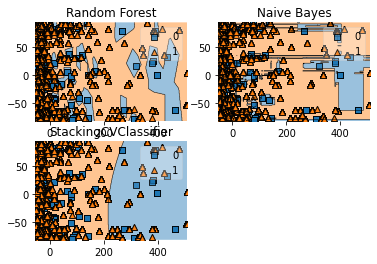

In [197]:
for clf, lab, grd in zip([clf1, clf2, clf3], 
                         ['Random Forest', 
                          'Naive Bayes',
                          'StackingCVClassifier'],
                          itertools.product([0, 1], repeat=2)):
  
    pca = PCA(n_components = 2)
    X = pca.fit_transform(x)

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X,y, clf=clf)
    plt.title(lab)
plt.show()

In [198]:
#Prepare data for Scenario 2 

In [199]:
df1=pd.read_csv("scenario2data/noeventdata.csv",sep=',', header=None)
df1.sample(5)

,0,1,2,3,4
50775,M,M32+,52,Huawei,Ascend G7
407493,M,M32+,35,Huawei,Mate 7
269800,M,M32+,44,Coolpad,ivvi Pro
267552,F,F32+,33,vivo,Y51
397426,M,M32+,34,lenovo,S8


In [200]:
df1.columns = ['gender', 'age_group','age', 'device_brand', 'phone_brand']

In [201]:
df1.sample(5)

,gender,age_group,age,device_brand,phone_brand
398364,F,F32+,33,Coolpad,5892
228654,M,M32+,37,Huawei,hu1
231527,M,M25-32,27,OPPO,R7
125846,M,M32+,53,Huawei,P8max
120960,F,F32+,33,TCL,3N


In [202]:
df1['gender']=df1['gender'].apply(lambda x: 1 if x=='M' else 0)
df1['age_group']=df1['age_group'].apply(lambda x: x[1:])

df1['age_group'] = df1['age_group'].astype('category')
df1['device_brand'] = df1['device_brand'].astype('category')
df1['phone_brand'] = df1['phone_brand'].astype('category')

df1['age_group'] = df1['age_group'].cat.codes
df1['device_brand'] = df1['device_brand'].cat.codes
df1['phone_brand'] = df1['phone_brand'].cat.codes

In [203]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407661 entries, 0 to 407660
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   gender        407661 non-null  int64
 1   age_group     407661 non-null  int8 
 2   age           407661 non-null  int64
 3   device_brand  407661 non-null  int8 
 4   phone_brand   407661 non-null  int16
dtypes: int16(1), int64(2), int8(2)
memory usage: 7.8 MB


In [204]:
#Linear Regression using age

In [205]:
y = df1['age']
X = df1.drop('age', 1)

In [206]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [207]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions = model.predict(X_test)

In [208]:
print(predictions[0:5])

[41.18251921 19.54693066 30.09866864 30.20474414 19.52892968]


In [209]:
y_test_pred=pd.DataFrame(predictions)

In [210]:
y_test_pred

,0
0,41.182519
1,19.546931
2,30.098669
3,30.204744
4,19.528930
...,...
81528,19.805303
81529,30.240007
81530,19.336881
81531,19.544185


In [211]:
print(lm.coef_)
print(lm.intercept_)

[-2.84902307e-01  1.06843436e+01 -3.29771001e-03 -3.82999596e-05]
19.926144790167392


In [212]:
#R2 score using Linear Regression
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.6568942422527415

In [213]:
df1.gender.value_counts()

1    273197
0    134464
Name: gender, dtype: int64

In [214]:
#Logistic Regression using age

In [215]:
y = df1['gender']
X = df1.drop('gender', 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [216]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
model = lm.fit(X_train,y_train)
predictions = model.predict(X_test)

In [217]:
print(predictions[0:5])

[1 1 1 1 1]


In [218]:
print(lm.coef_)
print(lm.intercept_)

[[ 8.79015784e-02 -8.53206376e-03 -2.92404466e-03 -3.99647874e-05]]
[1.02311101]


In [219]:
#R2 score using Logistic Regression
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

-0.4901398154071097

In [220]:
y_test_pred=pd.DataFrame(predictions)
y_test_pred['predicted'] = y_test_pred[0].apply(lambda x: 1 if x > 0.5 else 0)

In [221]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test, y_test_pred['predicted'])
print(confusion)

[[    0 26818]
 [    0 54715]]


In [222]:
#Regression using age using xgboost

In [223]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [224]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [225]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [226]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)

In [227]:
xg_reg.fit(X_train,y_train)

predct = xg_reg.predict(X_test)

[08:15:02] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [228]:
#RMSE using xgboost
rmse = np.sqrt(mean_squared_error(y_test, predct))
print("RMSE: %f" % (rmse))

RMSE: 0.469967


In [229]:
predct

array([0.56688416, 0.5732242 , 0.6192242 , ..., 0.5962865 , 0.6257498 ,
       0.6674907 ], dtype=float32)

In [230]:
params = {"objective":"reg:linear",'min_child_weight': [1, 5, 10],'gamma': [0.5, 1, 1.5, 2, 5], 'subsample': [0.6, 0.8, 1.0], 
          'colsample_by_tree': [0.6, 0.8, 1.0], 'max_depth': [3, 4, 5],'n_estimators': range(60, 360, 40),
          'learning_rate': [0.1, 0.01, 0.05]
          }

In [231]:
params = {"objective":"reg:linear",'min_child_weight': 5,'colsample_bytree': 1.0,'learning_rate': 0.1,
                'n_estimators': 360, 'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[08:15:03] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[08:15:03] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:15:03] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[08:15:03] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:15:03] WARNING: ../src/objective

In [232]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.493171,0.000072,0.493159,0.000024
1,0.487449,0.000126,0.487523,0.000064
2,0.482790,0.000182,0.482857,0.000076
3,0.478844,0.000158,0.478933,0.000181
4,0.475620,0.000181,0.475687,0.000219


In [233]:
#Regression using Gender using xgboost

In [234]:
y = df1['gender']
X = df1.drop('gender', 1)

In [235]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [236]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [237]:
xg_reg = xgb.XGBRegressor(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)

In [238]:
xg_reg.fit(X_train,y_train)

predct = xg_reg.predict(X_test)

In [239]:
#RMSE using Xgboost
rmse = np.sqrt(mean_squared_error(y_test, predct))
print("RMSE: %f" % (rmse))

RMSE: 0.470109


In [240]:
predct

array([0.5674448 , 0.57366925, 0.618923  , ..., 0.5964528 , 0.6255146 ,
       0.6646626 ], dtype=float32)

In [241]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1, 'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3, num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[08:15:13] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[08:15:13] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[08:15:13] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [242]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.494566,0.000019,0.494507,0.000073
1,0.489413,0.000365,0.489453,0.000473
2,0.485253,0.000669,0.485200,0.000772
3,0.481748,0.000375,0.481777,0.000525
4,0.478729,0.000413,0.478764,0.000564


In [243]:
#Stacking

In [244]:
RANDOM_SEED = None

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=RANDOM_SEED)
clf3 = GaussianNB()
lr = LogisticRegression()
SkFold = model_selection.StratifiedKFold(n_splits=10, random_state=7, shuffle=True)

In [245]:
sclf = StackingCVClassifier(classifiers=[clf1, clf2, clf3],meta_classifier=lr)

In [252]:
print('3-fold cross validation:\n')

for clf, label in zip([clf1,clf2, clf3, sclf], ['KNN','Random Forest', 'Naive Bayes', 'StackingClassifier']):
  scores = model_selection.cross_val_score(clf, x, y,  scoring='accuracy', cv=SkFold, n_jobs=-1, error_score='raise')
  print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

3-fold cross validation:



ValueError: Found input variables with inconsistent numbers of samples: [100000, 407661]

In [247]:
#Grid search CV

In [248]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

<Figure size 720x576 with 0 Axes>

In [249]:
for clf, lab, grd in zip([clf1, clf2, clf3], 
                         ['Random Forest', 
                          'Naive Bayes',
                          'StackingCVClassifier'],
                          itertools.product([0, 1], repeat=2)):
  
    pca = PCA(n_components = 2)
    X = pca.fit_transform(x)

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X,y, clf=clf)
    plt.title(lab)
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [100000, 407661]